<a href="https://colab.research.google.com/github/nicholauscjj/laughingcouscous/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nicholauscjj/laughingcouscous.git -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency
from sklearn.neural_network import MLPRegressor as mlpr
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/laughingcouscous/Placement_Data_Full_Class.xlsx')
df.columns = df.columns.str.lower()
df = df.drop(columns=['no'])
df

,gender,secondary education percentage - 10th grade,board of secondary education,higher secondary education percentage - 12th grade,board of higher secondary education,specialization in higher secondary education,degree percentage,field of degree education,work experience,employability test percentage (conducted by college),post graduation specialisation,post graduation percentage,status of placement,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Preprocessing

In [ ]:
#Separate data into input and output

X_data = df.iloc[:,:-1]
y_label = df.iloc[:,-1:]

In [ ]:
#list of column with categorical data
categorical_column = ['gender', 'board of secondary education', 'board of higher secondary education',
                      'specialization in higher secondary education', 'field of degree education', 'post graduation specialisation']
#list of column with binary data
binary_column = ['work experience', 'status of placement']

In [ ]:
#one-hot-encode categorical features

OHE_data = pd.get_dummies(X_data, columns=categorical_column, drop_first=True)
OHE_data[binary_column[0]].replace(('Yes', 'No'), (1, 0), inplace=True)
OHE_data[binary_column[1]].replace(('Placed', 'Not Placed'), (1, 0), inplace=True)

In [ ]:
#separate data into test and train

X_train, X_test, y_train, y_test = train_test_split(OHE_data, y_label, test_size=0.2, random_state=42069)

In [ ]:
def normalize_me(df):
  return (df-df.min())/(df.max()-df.min())

In [ ]:
#normalize data, fill output with average

X_train_normalized = normalize_me(X_train)
X_test_normalized = normalize_me(X_test)

y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

# Exploratory Data Analysis (EDA)

In [ ]:
join_col = categorical_column + binary_column

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
df_eda = df.copy(deep=True)
df_eda = df_eda.drop(columns=['salary'])

In [ ]:
for x in join_col:
  df_eda[x] = le.fit_transform(df_eda[x])

In [ ]:
df_eda_num = df_eda.loc[:, df_eda.columns != 'salary'].select_dtypes(include=np.number)

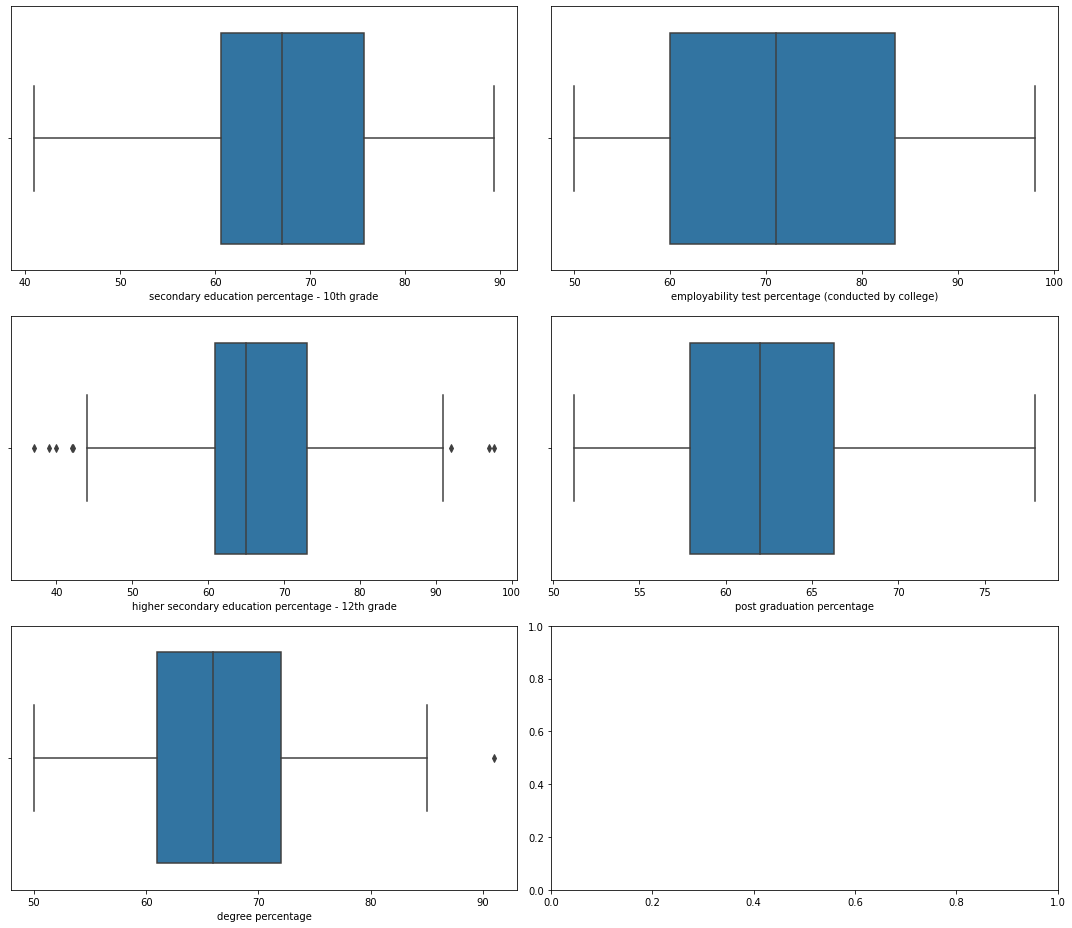

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (15, 13))
sns.boxplot(x=df_eda['secondary education percentage - 10th grade'], ax = ax[0,0])
sns.boxplot(x=df_eda['higher secondary education percentage - 12th grade'], ax = ax[1,0])
sns.boxplot(x=df_eda['degree percentage'], ax = ax[2,0])
sns.boxplot(x=df_eda['employability test percentage (conducted by college)'], ax = ax[0,1])
sns.boxplot(x=df_eda['post graduation percentage'], ax = ax[1,1])
plt.tight_layout()

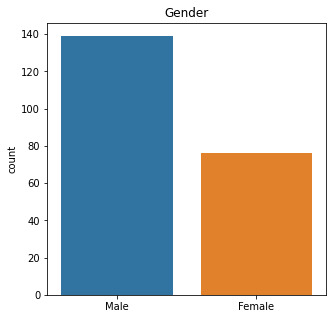

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_eda['gender'].values, data=df_eda)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Male'
labels[1] = 'Female'
ax.set_xticklabels(labels)
ax.set_title('Gender')
plt.show()

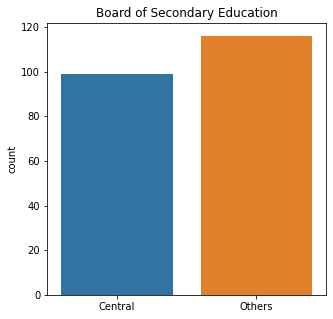

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_eda['board of secondary education'].values, data=df_eda)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Central'
labels[1] = 'Others'
ax.set_xticklabels(labels)
ax.set_title('Board of Secondary Education')
plt.show()

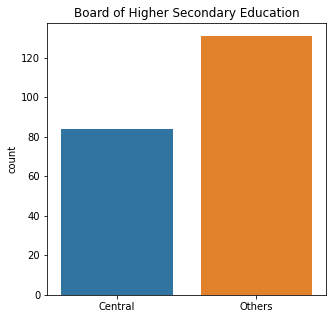

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_eda['board of higher secondary education'].values, order=['Central', 'Others'], data=df_eda)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Central'
labels[1] = 'Others'
ax.set_xticklabels(labels)
ax.set_title('Board of Higher Secondary Education')
plt.show()

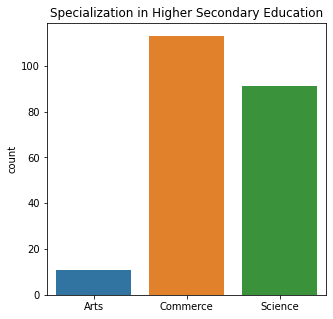

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_eda['specialization in higher secondary education'].values, order=['Arts', 'Commerce', 'Science'], data=df_eda)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Arts'
labels[1] = 'Commerce'
labels[2] = 'Science'
ax.set_xticklabels(labels)
ax.set_title('Specialization in Higher Secondary Education')
plt.show()

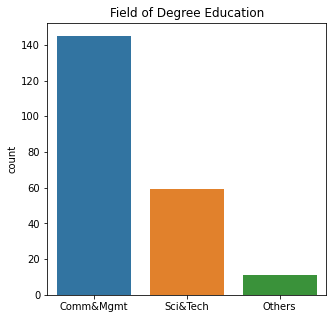

In [ ]:
arr_quick = ['Comm&Mgmt', 'Sci&Tech', 'Others']

fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_eda['field of degree education'].values, order=arr_quick, data=df_eda)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = arr_quick[0]
labels[1] = arr_quick[1]
labels[2] = arr_quick[2]
ax.set_xticklabels(labels)
ax.set_title('Field of Degree Education')
plt.show()

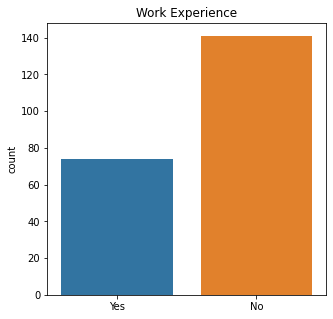

In [ ]:
arr_quick = ['Yes', 'No']

fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_eda['work experience'].values, order=arr_quick, data=df_eda)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = arr_quick[0]
labels[1] = arr_quick[1]
ax.set_xticklabels(labels)
ax.set_title('Work Experience')
plt.show()

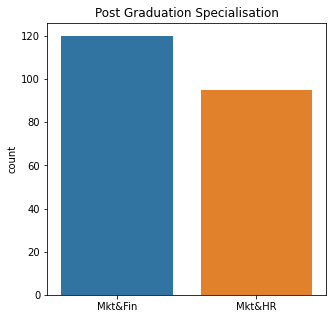

In [ ]:
arr_quick = ['Mkt&Fin', 'Mkt&HR']

fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_eda['post graduation specialisation'].values, order=arr_quick, data=df_eda)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = arr_quick[0]
labels[1] = arr_quick[1]
ax.set_xticklabels(labels)
ax.set_title('Post Graduation Specialisation')
plt.show()

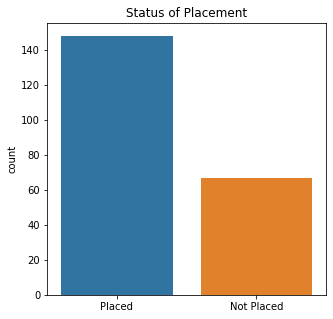

In [ ]:
arr_quick = ['Placed', 'Not Placed']

fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_eda['status of placement'].values, order=arr_quick, data=df_eda)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = arr_quick[0]
labels[1] = arr_quick[1]
ax.set_xticklabels(labels)
ax.set_title('Status of Placement')
plt.show()

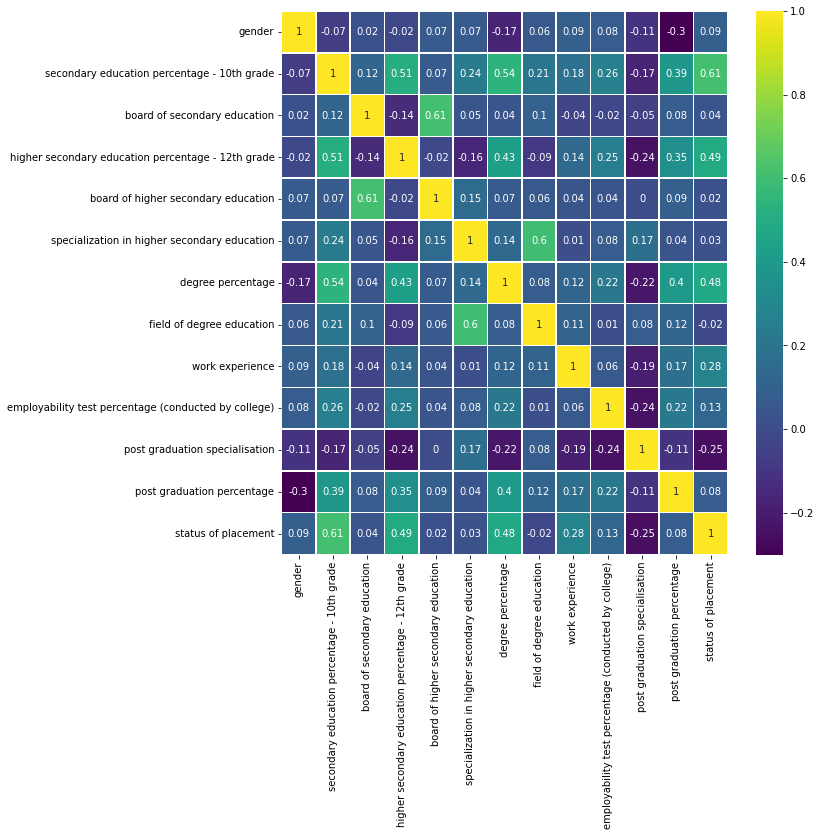

In [ ]:
corr = df_eda.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, linewidths=0.5, cmap='viridis')
plt.show()

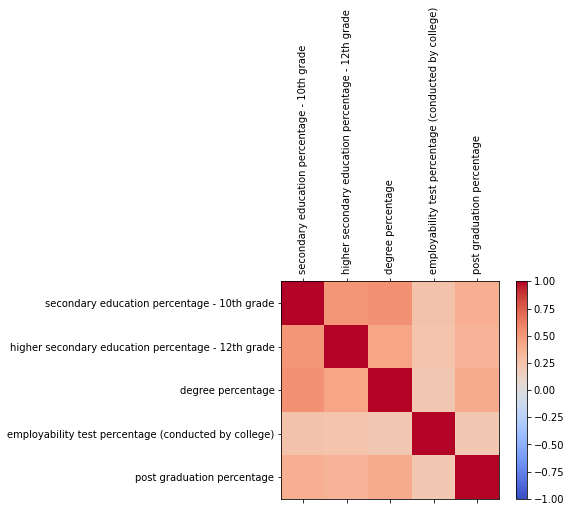

In [ ]:
df_numerics_only = df.loc[:, df.columns != 'salary'].select_dtypes(include=np.number)
corr = df_numerics_only.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_numerics_only.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_numerics_only.columns)
ax.set_yticklabels(df_numerics_only.columns)
plt.show()

# PCA (90% variance)

In [ ]:
# PCA with 0.9 variance percentage

pca = PCA(n_components=0.9, svd_solver='full')

X_train_PCA = pca.fit_transform(X_train_normalized)
X_test_PCA = pca.transform(X_test_normalized)

X_train_PCA_df = pd.DataFrame(X_train_PCA)
X_test_PCA_df = pd.DataFrame(X_test_PCA)

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9243170376782293


In [ ]:
print('Number of features before PCA: {}, after PCA: {}'.format(OHE_data.shape[1], X_train_PCA_df.shape[1]))

Number of features before PCA: 21, after PCA: 8


# Result Comparison

In [ ]:
#scale the y data to prevent huge RMSE value

train_scaler = preprocessing.MinMaxScaler()
y_train_scaled = train_scaler.fit_transform(y_train)

test_scaler = preprocessing.MinMaxScaler()
y_test_scaled = test_scaler.fit_transform(y_test)

In [ ]:
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

In [ ]:
# initiate SVR

plain_regr = mlpr()
plain_regr.fit(X_train_normalized, y_train_scaled)

MLPRegressor()

In [ ]:
# use the prediction result from SVR model with MSE

y_pred_plain = plain_regr.predict(X_test_normalized)
RMSE_plain = mean_squared_error(y_test_scaled, y_pred_plain)

In [ ]:
PCA_regr = mlpr()
PCA_regr.fit(X_train_PCA, y_train_scaled)

MLPRegressor()

In [ ]:
y_pred_PCA = PCA_regr.predict(X_test_PCA)
RMSE_PCA = mean_squared_error(y_test_scaled, y_pred_PCA)

In [ ]:
# result comparison

print(RMSE_plain)
print(RMSE_PCA)

0.021732374774896982
0.026626996223676144
